Naveed Ali

20L-1244

Data Analysis and Visualization 

Lab 3

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I am converting the TARGET column into a number of integers because it was in string already

In [66]:
file = pd.read_excel('my_iris.xlsx')
file.drop(columns = ['Unnamed: 0'], inplace = True)
file['target'] = file['target'].astype('category').cat.codes
file.head()

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,NaN,NaN,NaN,NaN,10.2,-7.0,5.6,-0.8,0
1,4.9,3.0,1.4,0.2,9.8,-6.0,5.6,-0.8,0
2,4.7,3.2,NaN,NaN,9.4,-6.4,5.2,-0.8,0
3,4.6,NaN,1.5,NaN,9.2,-6.2,6.0,-0.8,0
4,NaN,3.6,NaN,NaN,10.0,-7.2,5.6,-0.8,0


In [67]:
file.describe()


,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
count,130.000000,130.000000,130.000000,100.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.901538,3.005385,4.115385,1.453000,11.686667,-6.108000,15.034667,-4.794667,1.000000
std,0.835082,0.410013,1.621200,0.685117,1.656132,0.867189,7.057682,3.052643,0.819232
min,4.300000,2.000000,1.100000,0.100000,8.600000,-8.800000,4.000000,-10.000000,0.000000
25%,5.125000,2.800000,3.350000,1.100000,10.200000,-6.600000,6.400000,-7.200000,0.000000
50%,5.850000,3.000000,4.500000,1.500000,11.600000,-6.000000,17.400000,-5.200000,1.000000
75%,6.475000,3.200000,5.200000,2.000000,12.800000,-5.600000,20.400000,-1.200000,2.000000
max,7.900000,4.100000,6.900000,2.500000,15.800000,-4.000000,27.600000,-0.400000,2.000000


In [68]:
file.isna().sum()

sepal depth       20
sepal diameter    20
petal depth       20
petal diameter    50
sepal length       0
sepal width        0
petal length       0
petal width        0
target             0
dtype: int64

Here we see that 4 of the columns of the given dataframe have missing values
so we deal with the missng values as *putting the mean of that column in its missing values

In [69]:
filecopy = file.copy(deep = True)

In [70]:
# we can deal with the missing values using standard imputation mean median mode or 
# even linear regression model value.
print(file.mean())
print(file.median())

sepal depth        5.901538
sepal diameter     3.005385
petal depth        4.115385
petal diameter     1.453000
sepal length      11.686667
sepal width       -6.108000
petal length      15.034667
petal width       -4.794667
target             1.000000
dtype: float64
sepal depth        5.85
sepal diameter     3.00
petal depth        4.50
petal diameter     1.50
sepal length      11.60
sepal width       -6.00
petal length      17.40
petal width       -5.20
target             1.00
dtype: float64


First we compute the missing values with the mean of their respective column 
Incase Standard deviation is less among the columns, Mean will be a better solution

In [71]:
filecopy['sepal depth'] = filecopy['sepal depth'].fillna(filecopy['sepal depth'].mean())
filecopy['sepal diameter'] = filecopy['sepal diameter'].fillna(filecopy['sepal diameter'].mean())
filecopy['petal diameter'] = filecopy['petal diameter'].fillna(filecopy['petal diameter'].mean())
filecopy['petal depth'] = filecopy['petal depth'].fillna(filecopy['petal depth'].mean())



In [72]:
filecopy.head()

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,5.901538,3.005385,4.115385,1.453,10.2,-7.0,5.6,-0.8,0
1,4.900000,3.000000,1.400000,0.200,9.8,-6.0,5.6,-0.8,0
2,4.700000,3.200000,4.115385,1.453,9.4,-6.4,5.2,-0.8,0
3,4.600000,3.005385,1.500000,1.453,9.2,-6.2,6.0,-0.8,0
4,5.901538,3.600000,4.115385,1.453,10.0,-7.2,5.6,-0.8,0


In [73]:
checker = filecopy.corr()-file.corr()
checker.head()

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
sepal depth,0.000000,-0.008792,-0.080806,-0.121284,-0.061648,-0.006145,-0.075941,0.068232,-0.057999
sepal diameter,-0.008792,0.000000,0.024823,0.012505,0.004070,0.120136,0.039113,-0.029912,0.034570
petal depth,-0.080806,0.024823,0.000000,-0.151433,-0.081353,-0.033677,-0.145059,0.132294,-0.114870
petal diameter,-0.121284,0.012505,-0.151433,0.000000,-0.162618,-0.018030,-0.266035,0.268233,-0.232193
sepal length,-0.061648,0.004070,-0.081353,-0.162618,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

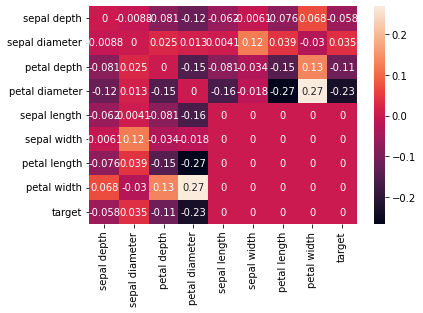

In [74]:
sns.heatmap(checker,annot = True)

Now we replace the missing values with their median 
Incase the standard deviaition is more among the columns, it will be a better option

In [75]:
filecopy2 = file.copy(deep = True)

In [76]:
filecopy2['sepal depth'] = filecopy2['sepal depth'].fillna(filecopy2['sepal depth'].median())
filecopy2['sepal diameter'] = filecopy2['sepal diameter'].fillna(filecopy2['sepal diameter'].median())
filecopy2['petal diameter'] = filecopy2['petal diameter'].fillna(filecopy2['petal diameter'].median())
filecopy2['petal depth'] = filecopy2['petal depth'].fillna(filecopy2['petal depth'].median())

In [77]:
filecopy2.head()

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,5.85,3.0,4.5,1.5,10.2,-7.0,5.6,-0.8,0
1,4.90,3.0,1.4,0.2,9.8,-6.0,5.6,-0.8,0
2,4.70,3.2,4.5,1.5,9.4,-6.4,5.2,-0.8,0
3,4.60,3.0,1.5,1.5,9.2,-6.2,6.0,-0.8,0
4,5.85,3.6,4.5,1.5,10.0,-7.2,5.6,-0.8,0


In [78]:
checker2 = filecopy2.corr()-file.corr()
checker2

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
sepal depth,0.000000,-0.010227,-0.103161,-0.134282,-0.057821,-0.002645,-0.069871,0.061848,-0.051122
sepal diameter,-0.010227,0.000000,0.054797,0.018263,0.005577,0.121527,0.041128,-0.031909,0.036539
petal depth,-0.103161,0.054797,0.000000,-0.161860,-0.117591,-0.065844,-0.193079,0.179321,-0.159570
petal diameter,-0.134282,0.018263,-0.161860,0.000000,-0.178156,-0.029517,-0.285484,0.287621,-0.252730
sepal length,-0.057821,0.005577,-0.117591,-0.178156,0.000000,0.000000,0.000000,0.000000,0.000000
sepal width,-0.002645,0.121527,-0.065844,-0.029517,0.000000,0.000000,0.000000,0.000000,0.000000
petal length,-0.069871,0.041128,-0.193079,-0.285484,0.000000,0.000000,0.000000,0.000000,0.000000
petal width,0.061848,-0.031909,0.179321,0.287621,0.000000,0.000000,0.000000,0.000000,0.000000
target,-0.051122,0.036539,-0.159570,-0.252730,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

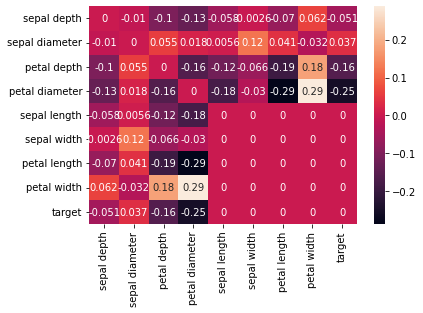

In [79]:
sns.heatmap(checker2,annot = True)

HOME TASK 

Now we will apply the linear regression model on both of the models and will check which of the wrangling technique was good

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [90]:
lin_reg = LinearRegression()

row = filecopy.shape[0]
train, test = filecopy.iloc[:int(row*0.75)], filecopy.iloc[int(row*0.75): ]
trainX, trainY = train.iloc[:,:-1], train.iloc[:, [-1]]
testX,testY = test.iloc[:,:-1], test.iloc[:, [-1]]

model = lin_reg.fit(trainX, trainY)


In [88]:
pred = model.predict(testX)

In [92]:
mean_squared_error(testY, pred)

    

0.1486457570887049

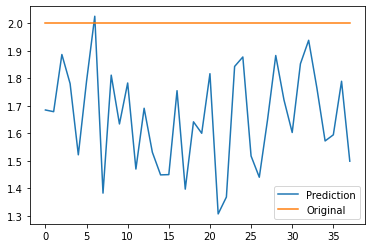

In [96]:
plt.plot(list(range(pred.shape[0])), pred, label="Prediction")
plt.plot(list(range(pred.shape[0])), testY, label="Original")
plt.legend()
plt.show()
